In [1]:
#Importing necessary library
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import itertools
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from multiprocessing.pool import ThreadPool
from datetime import datetime, date, timedelta
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
since_when_date = date(2018, 1, 1)
trailer_premiere_date = date(2018, 12, 7)
movie_premiere_date = date(2019, 4, 25)
until_when_date = datetime.today().strftime('%Y-%m-%d')

In [3]:
day_before_trailer_premiere_date = trailer_premiere_date - timedelta(days = 1)
day_before_movie_premiere_date = movie_premiere_date - timedelta(days = 1)

In [32]:
# import snscrape.modules.twitter as sntwitter

start_time = datetime.now() 
# Set the search query
search_query = '#AvengersEndgame'

# Function to scrape tweets based on search query and date range
def scrape_tweets(query, start_date=None, end_date=None, max_tweets=10000):
    tweet_list = []
    for tweet in sntwitter.TwitterSearchScraper(query + ' lang:en since:' + start_date + ' until:' + end_date).get_items():
        tweet_list.append(tweet)
        if len(tweet_list) >= max_tweets:
            break
    return tweet_list

# Function to measure script execution time
'''
def measure_execution_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time: {execution_time:.2f} seconds")
        return result
    return wrapper
'''
# Scrape tweets before the trailer release
print("Scraping tweets before trailer release...")
with ThreadPool(processes=1) as pool:
    tweets_before_trailer = pool.apply(scrape_tweets, (search_query, str(since_when_date), str(day_before_trailer_premiere_date), 10000))
print(f"Number of tweets before trailer: {len(tweets_before_trailer)}")

# Scrape tweets after the trailer release but before the movie premiere
print("Scraping tweets after trailer release but before movie premiere...")
with ThreadPool(processes=1) as pool:
    tweets_after_trailer = pool.apply(scrape_tweets, (search_query, str(trailer_premiere_date), str(day_before_movie_premiere_date), 100000))
print(f"Number of tweets after trailer but before premiere: {len(tweets_after_trailer)}")

# Scrape tweets after the movie premiere
print("Scraping tweets after movie premiere...")
with ThreadPool(processes=1) as pool:
    tweets_after_premiere = pool.apply(scrape_tweets, (search_query, str(movie_premiere_date), str(until_when_date), 10000))
print(f"Number of tweets after premiere: {len(tweets_after_premiere)}")

end_time = datetime.now()
#Printing the time duration for scraping these tweets
print('Duration: {}'.format(end_time - start_time))

Scraping tweets before trailer release...


Stopping after 20 empty pages


Number of tweets before trailer: 960
Scraping tweets after trailer release but before movie premiere...


Unavailable user in card on tweet 1120815459878588417
User 1166977877541380096 not found in user refs in card on tweet 1120815459878588417
Empty user ref object in card on tweet 1120814432215543808
User 899733078641225728 not found in user refs in card on tweet 1120814432215543808
Empty user ref object in card on tweet 1120728960021745664
User 786990663418179588 not found in user refs in card on tweet 1120728960021745664
Unavailable user in card on tweet 1120694418074406912
User 912584547665104902 not found in user refs in card on tweet 1120694418074406912
Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutE

ScraperException: Twitter responded with an error: DownstreamOverCapacityError: OverCapacity: Unspecified

In [31]:
tweets_after_premiere = pd.DataFrame(tweets_after_premiere)
df = tweets_after_premiere[['date','renderedContent']]
df = df.rename(columns = {'renderedContent':'Tweets'})
df['date'] = df['date'].dt.date
df.head(10)
df['date'].value_counts()

2023-04-26    915
2023-05-04    481
2023-05-05    330
2023-04-27    325
2023-04-25    249
2023-04-28    232
2023-05-06    212
2023-04-29    208
2023-05-08    183
2023-04-24    182
2023-05-07    176
2023-05-09    171
2023-05-15    169
2023-04-06    168
2023-05-03    164
2023-04-11    164
2023-05-02    161
2023-04-30    159
2023-05-13    159
2023-04-10    156
2023-05-21    156
2023-05-16    153
2023-04-21    152
2023-04-07    150
2023-05-14    149
2023-05-19    149
2023-04-04    148
2023-05-12    147
2023-04-18    146
2023-05-22    145
2023-04-03    144
2023-04-20    136
2023-05-20    135
2023-05-26    134
2023-05-10    133
2023-04-05    132
2023-05-11    126
2023-05-28    125
2023-04-14    125
2023-05-29    124
2023-04-09    122
2023-05-01    122
2023-04-23    121
2023-05-23    121
2023-04-19    121
2023-05-18    121
2023-04-08    119
2023-04-22    118
2023-04-17    118
2023-05-31    116
2023-04-16    116
2023-05-25    112
2023-04-12    110
2023-05-17    106
2023-04-15    103
2023-05-30

In [ ]:
tweets_after_trailer = pd.DataFrame(tweets_after_trailer)
df_tr = tweets_after_trailer[['date','renderedContent']]
df_tr = df_tr.rename(columns = {'renderedContent':'Tweets'})
df_tr['date'] = df_tr['date'].dt.date
df_tr['date'].value_counts()

In [6]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    text = re.sub(r'[^\w\s]', '', text)

    return text
df['cleanedTweets'] = df['Tweets'].apply(cleanTweets) #apply cleanTweets function to the tweet
df.head(5) #compares original tweets with cleaned Tweets

,Tweets,cleanedTweets
0,@FaridRached Memorable:\nTenet\nAvengers: Endg...,Memorable Tenet Avengers Endgame Spiderman In...
1,@JhgUeh_EyEl U gottaWATCH aMOVIE with thoseGOO...,U gottaWATCH aMOVIE with thoseGOODIES My top ...
2,@jbromovies i thought avengers endgame made it,i thought avengers endgame made it
3,"I don't have a single favorite movie, but my t...",I dont have a single favorite movie but my top...
4,@CharCubed avengers endgame rewrite 2.0 let's ...,avengers endgame rewrite 20 lets go


In [7]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# apply the function df

df['reviewText'] = df['cleanedTweets'].apply(preprocess_text)
df.head(5)

,Tweets,cleanedTweets,reviewText
0,@FaridRached Memorable:\nTenet\nAvengers: Endg...,Memorable Tenet Avengers Endgame Spiderman In...,memorable tenet avenger endgame spiderman spid...
1,@JhgUeh_EyEl U gottaWATCH aMOVIE with thoseGOO...,U gottaWATCH aMOVIE with thoseGOODIES My top ...,u gottawatch amovie thosegoodies top 10 marvel...
2,@jbromovies i thought avengers endgame made it,i thought avengers endgame made it,thought avenger endgame made
3,"I don't have a single favorite movie, but my t...",I dont have a single favorite movie but my top...,dont single favorite movie top five pick raimi...
4,@CharCubed avengers endgame rewrite 2.0 let's ...,avengers endgame rewrite 20 lets go,avenger endgame rewrite 20 let go


In [23]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment_vader(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['compound'] > 0.05 else (-1 if scores['compound'] < 0.05 else 0)
    return sentiment

# apply get_sentiment_vader function
df['sentiment_vader'] = df['reviewText'].apply(get_sentiment_vader)

df.head(10)

,Tweets,cleanedTweets,reviewText,sentiment_vader,sentiment_te,Happy,Angry,Surprise,Sad,Fear
0,@FaridRached Memorable:\nTenet\nAvengers: Endg...,Memorable Tenet Avengers Endgame Spiderman In...,memorable tenet avenger endgame spiderman spid...,1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,...",0.00,0.00,0.33,0.33,0.33
1,@JhgUeh_EyEl U gottaWATCH aMOVIE with thoseGOO...,U gottaWATCH aMOVIE with thoseGOODIES My top ...,u gottawatch amovie thosegoodies top 10 marvel...,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.67,...",0.00,0.00,0.67,0.33,0.00
2,@jbromovies i thought avengers endgame made it,i thought avengers endgame made it,thought avenger endgame made,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.00,0.00,1.00,0.00
3,"I don't have a single favorite movie, but my t...",I dont have a single favorite movie but my top...,dont single favorite movie top five pick raimi...,1,"{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3...",0.33,0.33,0.33,0.00,0.00
4,@CharCubed avengers endgame rewrite 2.0 let's ...,avengers endgame rewrite 20 lets go,avenger endgame rewrite 20 let go,-1,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.00,0.00,0.00,0.00,0.00
5,@NicholasPas5 Did Spider-man coming back to li...,Did Spiderman coming back to life in Avengers...,spiderman coming back life avenger endgame und...,-1,"{'Happy': 0.0, 'Angry': 0.17, 'Surprise': 0.33...",0.00,0.17,0.33,0.17,0.33
6,The Russo Brothers Reveal the Scene From AVENG...,The Russo Brothers Reveal the Scene From AVENG...,russo brother reveal scene avenger endgame too...,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...",0.00,0.00,1.00,0.00,0.00
7,Just realize the South Park episode where they...,Just realize the South Park episode where they...,realize south park episode adult go back time ...,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.00,0.00,0.50,0.50
8,"@esplanerd That was me at WDW, it felt like wa...",That was me at WDW it felt like watching Aven...,wdw felt like watching avenger endgame every t...,1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...",0.00,0.00,0.50,0.50,0.00
9,"8. avengers endgame\n5/5\n\nas an mcu film, it...",8 avengers endgame 55 as an mcu film it was t...,8 avenger endgame 55 mcu film perfect ending i...,1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...",0.00,0.00,0.50,0.25,0.25


In [9]:
# create get_sentiment_te function
def get_sentiment_te(text):
    scores = te.get_emotion(text)
    # sentiment = 1 if scores['compound'] > 0.05 else (-1 if scores['compound'] < 0.05 else 0)
    # return sentiment
    return scores


# apply get_sentiment vader function
df['sentiment_te'] = df['reviewText'].apply(get_sentiment_te)

df.head(10)

,Tweets,cleanedTweets,reviewText,sentiment_vader,sentiment_te
0,@FaridRached Memorable:\nTenet\nAvengers: Endg...,Memorable Tenet Avengers Endgame Spiderman In...,memorable tenet avenger endgame spiderman spid...,1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,..."
1,@JhgUeh_EyEl U gottaWATCH aMOVIE with thoseGOO...,U gottaWATCH aMOVIE with thoseGOODIES My top ...,u gottawatch amovie thosegoodies top 10 marvel...,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.67,..."
2,@jbromovies i thought avengers endgame made it,i thought avengers endgame made it,thought avenger endgame made,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
3,"I don't have a single favorite movie, but my t...",I dont have a single favorite movie but my top...,dont single favorite movie top five pick raimi...,1,"{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3..."
4,@CharCubed avengers endgame rewrite 2.0 let's ...,avengers endgame rewrite 20 lets go,avenger endgame rewrite 20 let go,-1,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
5,@NicholasPas5 Did Spider-man coming back to li...,Did Spiderman coming back to life in Avengers...,spiderman coming back life avenger endgame und...,-1,"{'Happy': 0.0, 'Angry': 0.17, 'Surprise': 0.33..."
6,The Russo Brothers Reveal the Scene From AVENG...,The Russo Brothers Reveal the Scene From AVENG...,russo brother reveal scene avenger endgame too...,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ..."
7,Just realize the South Park episode where they...,Just realize the South Park episode where they...,realize south park episode adult go back time ...,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
8,"@esplanerd That was me at WDW, it felt like wa...",That was me at WDW it felt like watching Aven...,wdw felt like watching avenger endgame every t...,1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ..."
9,"8. avengers endgame\n5/5\n\nas an mcu film, it...",8 avengers endgame 55 as an mcu film it was t...,8 avenger endgame 55 mcu film perfect ending i...,1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ..."


In [10]:
df = pd.concat([df, pd.DataFrame(df['sentiment_te'].to_list())], axis = 1)

In [11]:
df.head(5)

,Tweets,cleanedTweets,reviewText,sentiment_vader,sentiment_te,Happy,Angry,Surprise,Sad,Fear
0,@FaridRached Memorable:\nTenet\nAvengers: Endg...,Memorable Tenet Avengers Endgame Spiderman In...,memorable tenet avenger endgame spiderman spid...,1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,...",0.00,0.00,0.33,0.33,0.33
1,@JhgUeh_EyEl U gottaWATCH aMOVIE with thoseGOO...,U gottaWATCH aMOVIE with thoseGOODIES My top ...,u gottawatch amovie thosegoodies top 10 marvel...,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.67,...",0.00,0.00,0.67,0.33,0.00
2,@jbromovies i thought avengers endgame made it,i thought avengers endgame made it,thought avenger endgame made,-1,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.00,0.00,1.00,0.00
3,"I don't have a single favorite movie, but my t...",I dont have a single favorite movie but my top...,dont single favorite movie top five pick raimi...,1,"{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3...",0.33,0.33,0.33,0.00,0.00
4,@CharCubed avengers endgame rewrite 2.0 let's ...,avengers endgame rewrite 20 lets go,avenger endgame rewrite 20 let go,-1,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.00,0.00,0.00,0.00,0.00


In [12]:
total_emotions = df[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear','sentiment_vader']].groupby('sentiment_vader').sum()
mean_emotions = df[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear','sentiment_vader']].groupby('sentiment_vader').mean()

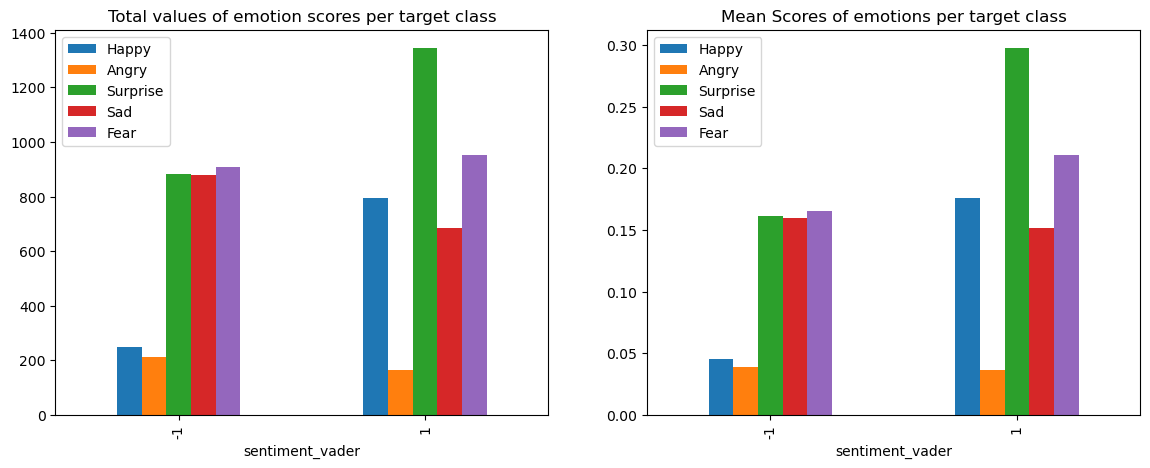

In [13]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
ax1 = total_emotions.plot(kind='bar', ax = axes[0])
ax1.set_title('Total values of emotion scores per target class')
ax2 = mean_emotions.plot(kind='bar', ax = axes[1])
ax2.set_title('Mean Scores of emotions per target class');

<Axes: xlabel='sentiment_vader', ylabel='Fear'>

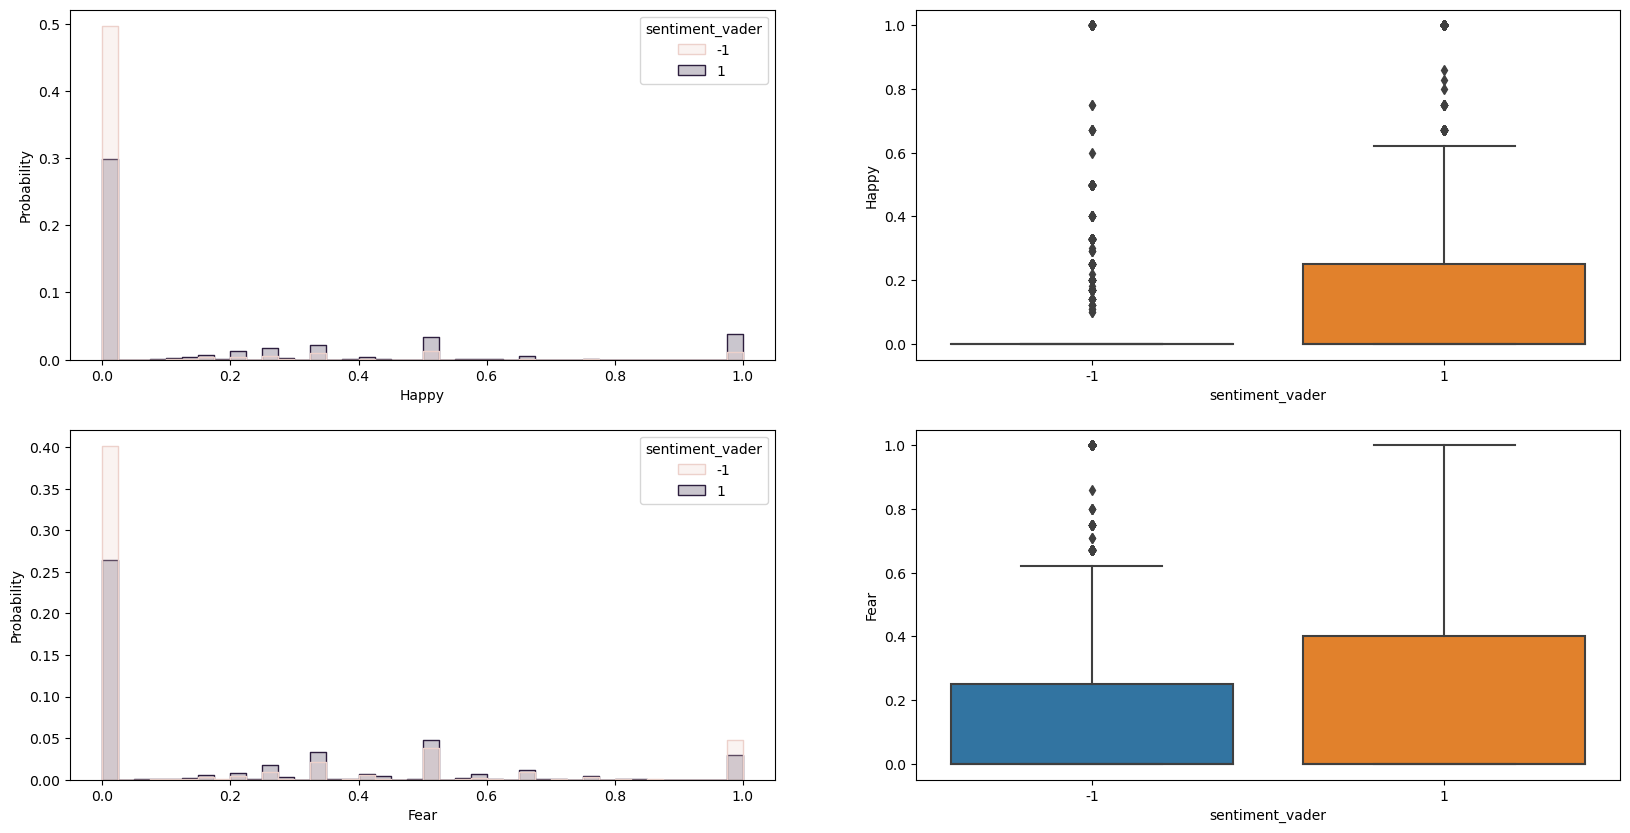

In [14]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
sns.histplot(data = df, 
             x= 'Happy',  
             hue = 'sentiment_vader',
             element='step',
             stat='probability',
            bins=40,
            ax=axes[0,0])
sns.boxplot(data = df, x = 'sentiment_vader', y = 'Happy',ax=axes[0,1])
sns.histplot(data = df, 
             x= 'Fear',  
             hue = 'sentiment_vader',
             element='step',
             stat='probability',
            bins=40,
            ax=axes[1,0])
sns.boxplot(data = df, x = 'sentiment_vader', y = 'Fear',ax=axes[1,1])

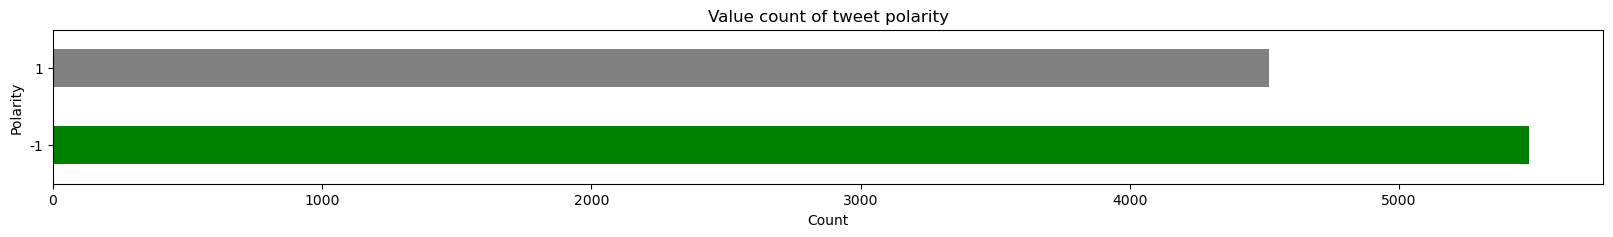

In [15]:
# plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(20,2))
color = ['green','grey','red']
df['sentiment_vader'].value_counts().plot(kind='barh',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Polarity')
plt.xlabel('Count')
plt.grid(False)
plt.show()

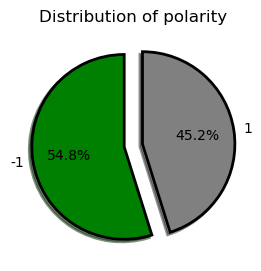

In [16]:
# pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(3,3))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['sentiment_vader'].value_counts()
# explode = (0.1,0.1,0.1)
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')
plt.show()

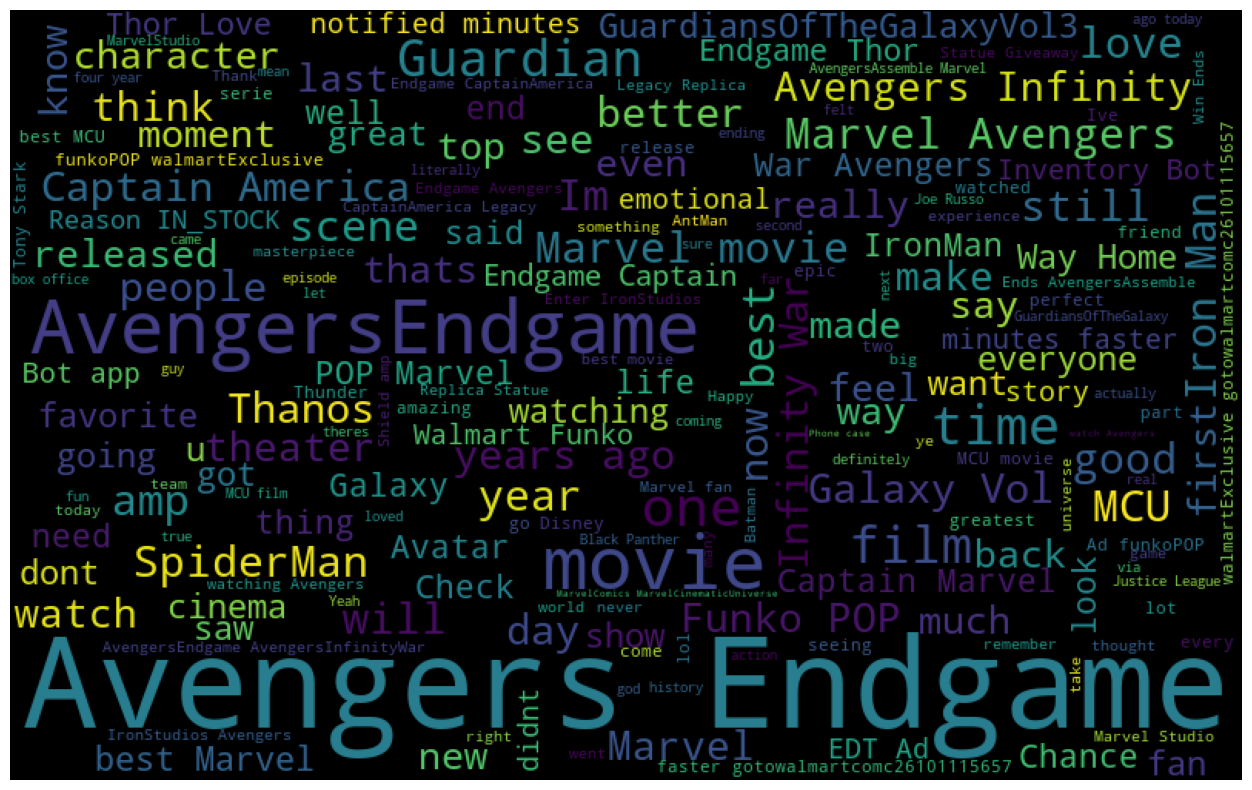

In [17]:
# create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
    
# wordcloud for positive tweets
posTweets = df.loc[df['sentiment_vader']==1, 'cleanedTweets']
create_wordcloud(posTweets)

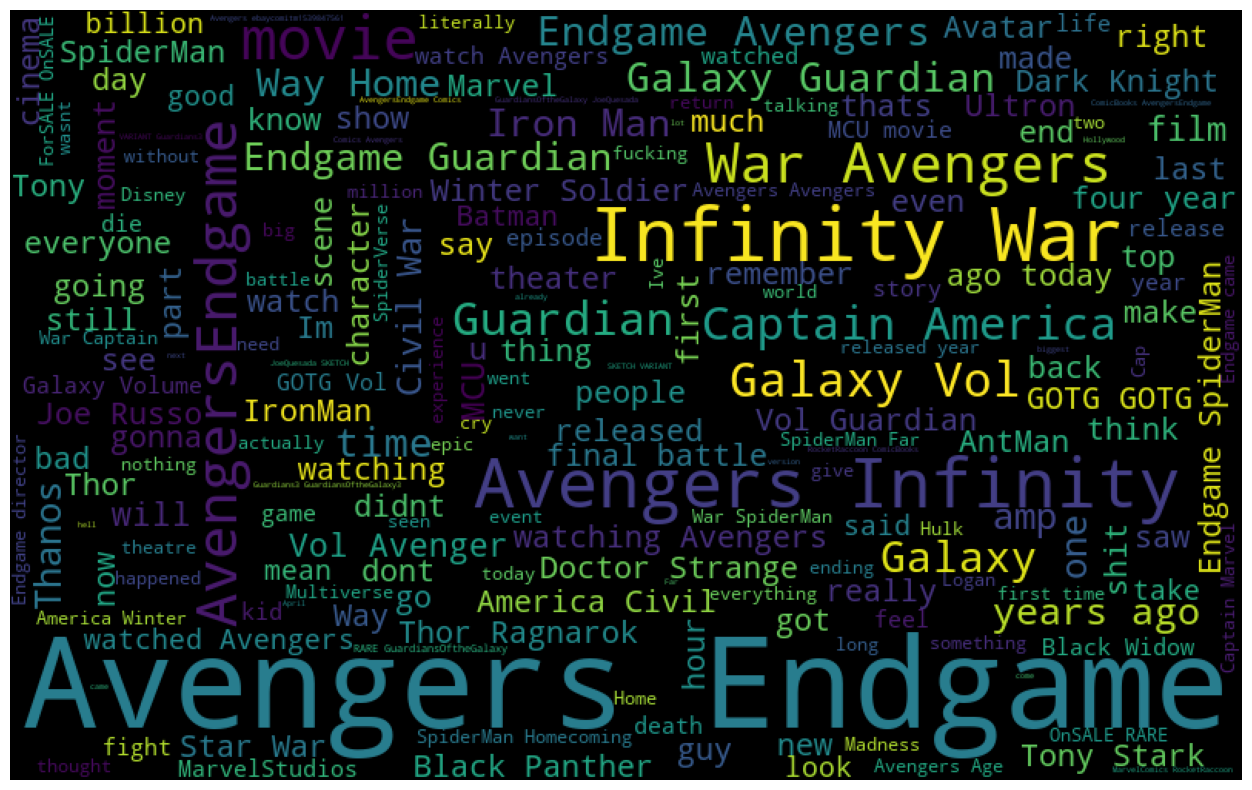

In [18]:
# wordcloud for negative tweets
negTweets = df.loc[df['sentiment_vader']==-1, 'cleanedTweets']
create_wordcloud(negTweets)

In [19]:
# break each tweet sentence into words
'''
sentences = []
for word in df['reviewText']:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet
'''

"\nsentences = []\nfor word in df['reviewText']:\n    sentences.append(word)\nsentences\nlines = list()\nfor line in sentences:\n    words = line.split()\n    for w in words:\n        lines.append(w)\nlines[:10] #shows first 10 words in the first tweet\n"

In [20]:
def tokenize_and_count_words(text):
    # Break each sentence into words
    sentences = []
    for word in text:
        sentences.append(word)
    sentences

    lines = list()
    for line in sentences:
        words = line.split()
        for w in words:
            lines.append(w)
    # lines[:10] #shows first 10 words in the first tweet

    # Tokenize the words
    tokens = [word_tokenize(word.lower()) for word in lines]

    # Flatten the list of tokens
    tokens = [token for sublist in tokens for token in sublist]

    # Create a new dataframe for the stem and show the count of the most used words
    df_stem = pd.DataFrame(tokens)
    df_stem = df_stem[0].value_counts()
    return df_stem

df_stem = tokenize_and_count_words(df['reviewText'])
df_stem

avenger            10180
endgame             8628
movie               2074
avengersendgame     1768
marvel              1462
                   ...  
neytiri                1
pandora                1
memo                   1
disregarding           1
hyperfixations         1
Name: 0, Length: 15434, dtype: int64

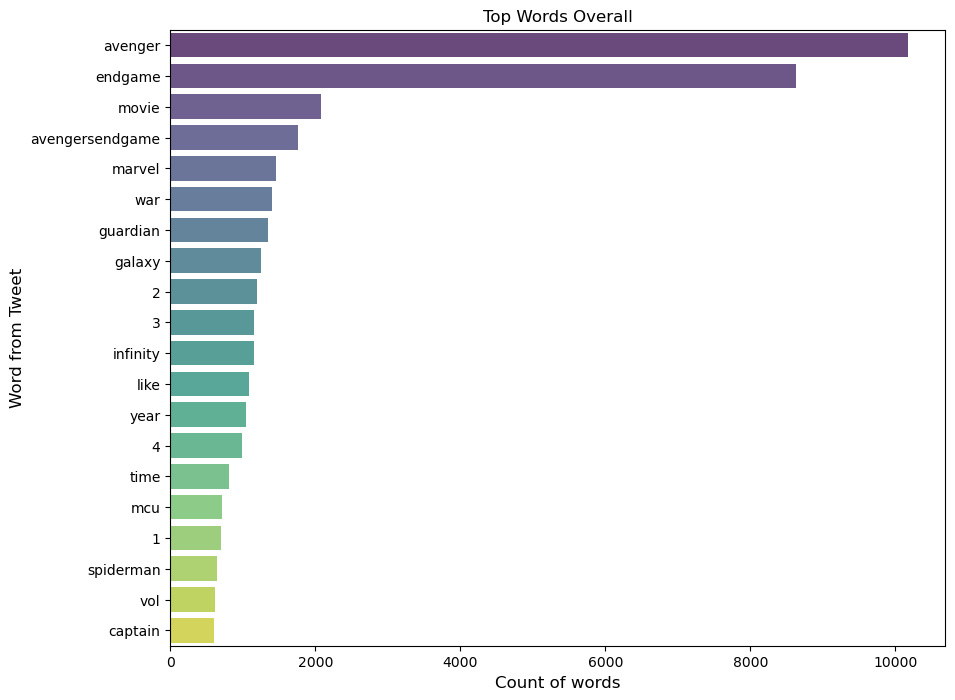

In [21]:
# plots the top 20 used words
df_stem = df_stem[:20]
plt.figure(figsize=(10, 8))
sns.barplot(x=df_stem.values, y=df_stem.index, alpha=0.8, palette='viridis')
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()